In [69]:
#Daniel Bon Durant
#Date: 12/4/2023
#Advanced Python Programming (CIS-2532-NET02)

#This program demonstrates code written by Joseph Lee Wei En
#This program is not original, simply a duplicate program to learn how the code and learn Neural Networks work.
#Original Author: Joseph Lee Wei En
#Duplicate Author: Daniel Bon Durant
#link to Joseph Lee Wei En's article, Build your first Neural Network to predict hosue prices with Keras:
#https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c


#Description: This is a duplicate of Joseph Lee Wei En's original work.
#             This program is intended to predict house prices uses a neural network, designed with the 
#             Keras library using python. The program will first preprocess some data that examines house prices.
#             Additionally, the program will compile the data, sort it into training, test, and validation data sets.
#             Finally, the data will be compiled and trained on a model, which will have its accuracy and loss graphed,
#             comparing its accuracy and loss.



In [70]:
#import necessary packages
import pandas as pd

In [71]:
#read the csv file
df = pd.read_csv('housepricedata.csv')

In [72]:
#view the contents of the file
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [73]:
#convert it into arrays for the machine to process it
dataset = df.values

In [74]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [75]:
#split data into input features (X) and the features we wish to predit, (Y)
#input features = dataset at all rows of columns 0 to 9
X = dataset[:,0:10]

#assignt the predicted value to the last column of the array
Y = dataset[:,10]

In [76]:
#in order to properly scale the input features we use a package from sklearn
from sklearn import preprocessing

#use the minmax scaler so all input features are between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()

#transforms the x scaler
X_scale = min_max_scaler.fit_transform(X)

In [77]:
#see what X_scale looks like
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [78]:
#to split the data into training data, test data, and a validation set, we use train_test_split from sklearn
from sklearn.model_selection import train_test_split

#split the data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#The data will be 30% of the overall dataset

In [79]:
#Split the data again to create a validation set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [80]:
#The six variables are (copy paste from medium.com article by Joseph Lee Wei En)
#X_train (10 input features, 70% of full dataset)
#X_val (10 input features, 15% of full dataset)
#X_test (10 input features, 15% of full dataset)
#Y_train (1 label, 70% of full dataset)
#Y_val (1 label, 15% of full dataset)
#Y_test (1 label, 15% of full dataset)

In [81]:
#see the shapes of the arrays for each variable
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [82]:
#-----------------------End of preprocessing-------------------------

In [83]:
#import from keras to begin setting up the neural network
from keras.models import Sequential
from keras.layers import Dense

In [84]:
#store our model in the variable model, each layer described within square brackets
model = Sequential([
    #first layer has 32 neurons, is dense, and ReLU activation, input shape is 10 because the shape from input line 12 is also 10.
    Dense(32, activation='relu', input_shape=(10,)),
    
    #second layer is also 32 neurons, ReLu activation. The first layer tells keras the second layers shape, it is not needed to specify further
    Dense(32, activation='relu'),

    #the third layer is a single neuron with sigmoid activation
    Dense(1, activation='sigmoid'),#sigmoid compresses the data between 0 and 1
])

In [85]:
#to configure the model it is necessary to call model.compile
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [86]:
#track accuracy as well as loss function. 
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=100,
                validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 5s 42ms/step - loss: 0.7038 - accuracy: 0.4853 - val_loss: 0.6951 - val_accuracy: 0.5251
Epoch 2/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6881 - accuracy: 0.6204 - val_loss: 0.6824 - val_accuracy: 0.6804
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6774 - accuracy: 0.6800 - val_loss: 0.6735 - val_accuracy: 0.7032
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6694 - accuracy: 0.6879 - val_loss: 0.6659 - val_accuracy: 0.7169
Epoch 5/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6622 - accuracy: 0.7133 - val_loss: 0.6587 - val_accuracy: 0.7260
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6552 - accuracy: 0.7221 - val_loss: 0.6517 - val_accuracy: 0.7397
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6483 - accuracy: 0.7202 - val_loss: 0.6448 - val_accuracy: 0.7443
Epoch 8

In [87]:
#note that loss decreases and accuracy increases over time in this training

In [88]:
#evaluate the model on the test set. We are indexing at 1 to get the accuracy. 
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 7ms/step - loss: 0.2259 - accuracy: 0.9406


0.9406392574310303

In [89]:
#VISUALIZE Loss and Accuracy
import matplotlib.pyplot as plt

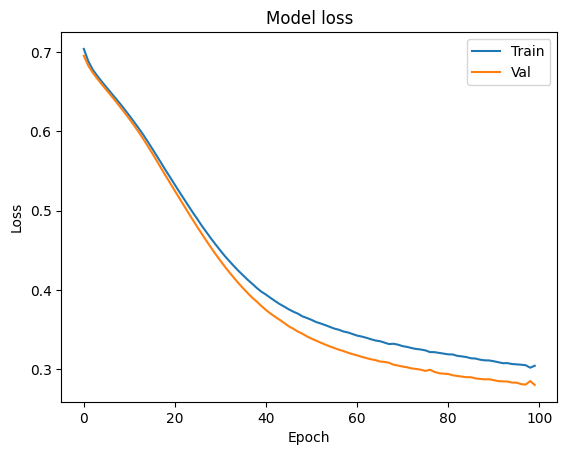

In [90]:
#create graph to show the training loss and validation loss
#determine what is to be graphed, in this case loss and val_loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

#give names to the graph, model Loss and Loss
plt.title('Model loss')

#provide the X and Y axis
plt.ylabel('Loss')
plt.xlabel('Epoch')

#legend for the graph, in the upper right
plt.legend(['Train', 'Val'], loc='upper right')

#display the graph
plt.show()

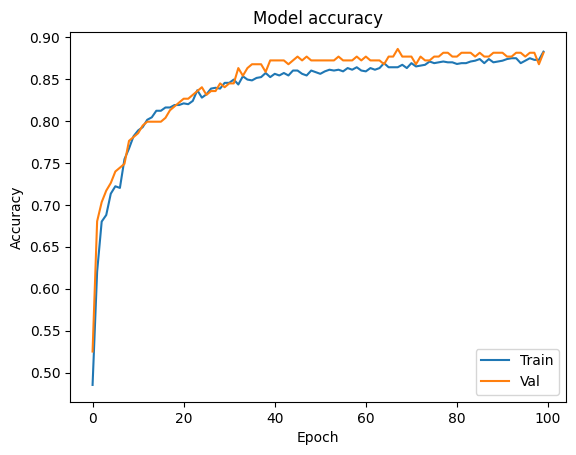

In [91]:
#now to diosplay the training accuracy and validation accuracy

#select what is to be plotted, accuracy and val_accuracy (accuracy)
#in the original authors program he calls them acc and val_acc, mine are accuracy and val_accuracy. Same data though
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

#give the graph a title
plt.title('Model accuracy')

#give the graph x and y axes
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

#legend is on the lower right, displaying what is train and what is val
plt.legend(['Train', 'Val'], loc='lower right')

#display the graph
plt.show()

In [92]:
#adding regularization to the network
#first formulate using a neural network the will badly overfit the training set
model_2 = Sequential([
    #defining the layers of the network
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#compiling the model and selecting an optimizer, the loss and metrics as well
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',#the loss function
              metrics=['accuracy'])#specify what is the metric

#train the model using the fit method
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,#train it on a batch of 32, 100 times
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 12s 99ms/step - loss: 0.4603 - accuracy: 0.8004 - val_loss: 0.3239 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 2s 57ms/step - loss: 0.3775 - accuracy: 0.8513 - val_loss: 0.3017 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 2s 55ms/step - loss: 0.3155 - accuracy: 0.8640 - val_loss: 0.2713 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 0.3046 - accuracy: 0.8787 - val_loss: 0.2849 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 2s 54ms/step - loss: 0.2964 - accuracy: 0.8796 - val_loss: 0.3493 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 2s 55ms/step - loss: 0.2770 - accuracy: 0.8806 - val_loss: 0.2573 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 2s 54ms/step - loss: 0.2782 - accuracy: 0.8757 - val_loss: 0.2468 - val_accuracy: 0.8904
Epoch

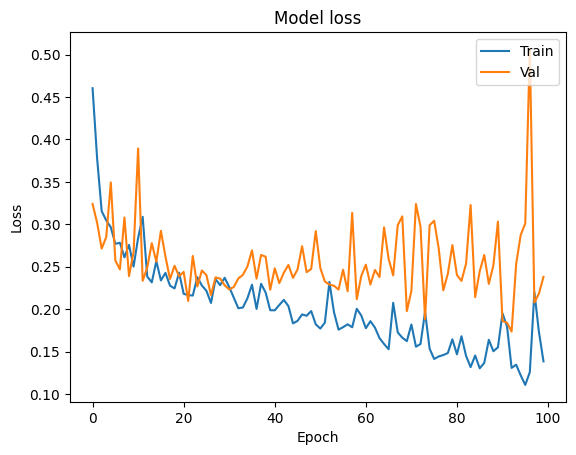

In [93]:
#graph the data once it is finished training
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

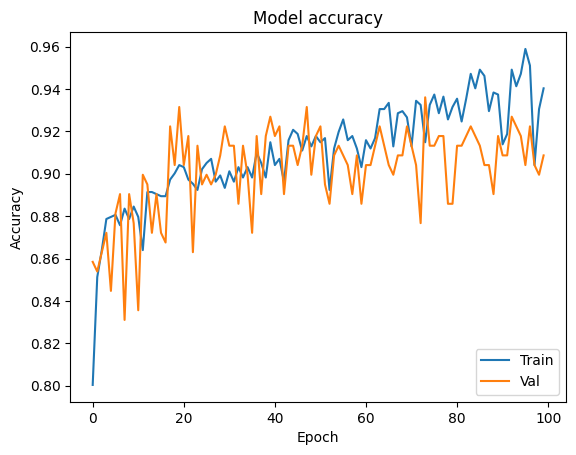

In [94]:
#overfitting because the training loss is far below the validation loss. You can see this on the plot for accuracy as well
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [95]:
#to reduce overfitting, we incorportate L2 regularization and dropout. 
#L2 is to reduce overfitting by penalizing any larger parameters
#dropout is to randomly (with a fixed probability) stop the model from training on specific neurons
#that will enable the model to not rely on a specific neuron becuase it will randomly lose some
#source: https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1b-introduction-to-neural-networks-8565d97ddd2d

from keras.layers import Dropout
from keras import regularizers

#specify the third model with these principles in mind
model_3 = Sequential([#new code for l2 is within the dense brackets
                      #the code for the dropouts is another layer
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

#compile the model, optimizer is adam, loss function is binary, metric will be accuract
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#trian the data using fit method. Training the training data of course, batch size of 32 100 times
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 11s 93ms/step - loss: 14.2439 - accuracy: 0.6145 - val_loss: 3.9269 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 2s 64ms/step - loss: 1.7245 - accuracy: 0.7671 - val_loss: 0.6758 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 2s 65ms/step - loss: 0.6381 - accuracy: 0.8023 - val_loss: 0.4881 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 2s 61ms/step - loss: 0.5396 - accuracy: 0.8444 - val_loss: 0.4817 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 62ms/step - loss: 0.5022 - accuracy: 0.8640 - val_loss: 0.4877 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 2s 63ms/step - loss: 0.4925 - accuracy: 0.8640 - val_loss: 0.4773 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 2s 63ms/step - loss: 0.5030 - accuracy: 0.8444 - val_loss: 0.4476 - val_accuracy: 0.8676
Epoc

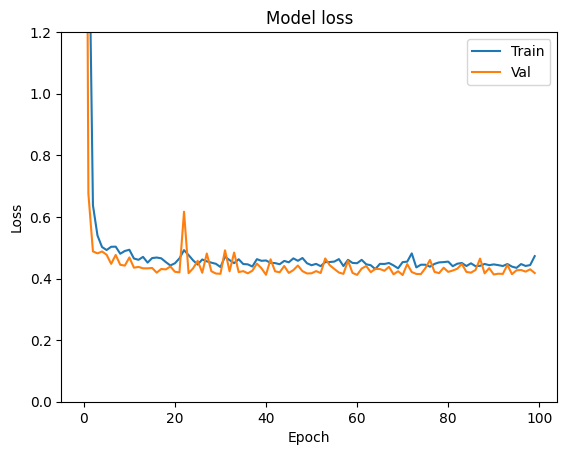

In [96]:
#plot the loss and accuracy graphs
#same code as above graphs just a different model. All the same lines except we are limiting the window between 0 and 1.2
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

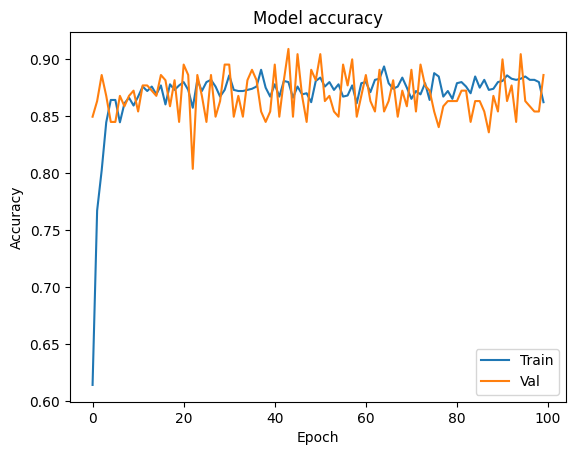

In [97]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [98]:
#overfitting has been severely reduced
#model is much more accurate

#credit again to Joseph Lee Wei En for providing the article which includes the code to perform this program
#I used his code exclusively, with no code of my own origin. I learned a lot from this exercise.